<a href="https://colab.research.google.com/github/divya-medarametla/CMPE-255-Credit_Hazard-Forecasting/blob/main/CMPE_255_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTS

Credit Hazard Forecasting

Banks lose a significant amount of money as a result of credit defaults, and it is ultimately ordinary customers who bear the brunt of this error. Credit Risk Analysis is used by banks to ensure that credit is supplied to a trustworthy consumer. Credit risk is defined as the risk of defaulting on a loan as a result of the borrower's failure to make mandatory debt payments on time. The lender assumes this risk because the lender loses both the capital and the interest on the loan.

Machine Learning-based credit risk analysis eliminates the time-consuming human process of assessing numerous criteria and conditions on which credit can be granted. In the process, it also eliminates the human factor of mathematical mistake and corruption.

From this project we aim to build a model to predict whether a person is eligible to get a credit or not. The decision depends on his/her banking history and other parameters mentioned below.

Data Set

The dataset we are using has data for 32,581 borrowers and 12 features related to each of them. Below listed are the features.

From the dataset, we can see that the 'loan_status' is the target variable with '1' - the borrower will default on the loan and '0' - the borrower will not.

Numerical Vairables:
person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_percent_income, cb_preson_cred_hist_length.

Categorical Variables:
person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file, loan_status.

In the data, we have missing values from the 'personemplength' and 'loan_int_rate' columns. But the missing values are a small percentage of the data, So we can remove those rows that have the missing values.

Source Dataset:

https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

##Reading data

In [ ]:
base_credit = pd.read_csv('/content/credit_risk_dataset.csv')

In [ ]:
base_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


##EXPLORATORY DATA ANALYSIS

###univariate analysis of continuous variables

In [ ]:
measures_df = base_credit.select_dtypes(include='number')

NameError: ignored

In [ ]:
measures_df

In [ ]:
measures_df.describe()

In [ ]:
columns = list(measures_df.columns)
columns.remove('loan_status')
columns

In [ ]:
grp = base_credit.groupby('loan_status')
for col in columns:
    plt.figure()
    #plt.hist(base_credit[col], density = True)
    grp[col].plot(kind='kde')
    x = col
    plt.xlabel(x)
    y = 'Density'
    plt.ylabel(y)
    plt.title('Distribution of {xLabel}'.format(xLabel=x))

###bivariate analysis on numerical features

In [ ]:
sns.pairplot(measures_df, hue = 'loan_status', corner = True)

In [ ]:
measures_df.boxplot(column = 'person_age', by='loan_status')

In [ ]:
measures_df.boxplot(column=['person_age'],by='loan_status')

In [ ]:
base_credit['person_home_ownership'].value_counts()

In [ ]:
base_credit['loan_intent'].value_counts()

In [ ]:
base_credit['loan_grade'].value_counts()

In [ ]:
base_credit['cb_person_default_on_file'].value_counts()

In [ ]:
sns.boxplot(data=base_credit, x="person_age", y="cb_person_default_on_file", hue="loan_status")

##PREPROCESSING

###dropping null valued rows

In [ ]:
base_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
base_credit = base_credit.dropna()

In [ ]:
base_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


###outliers

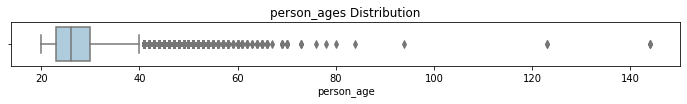

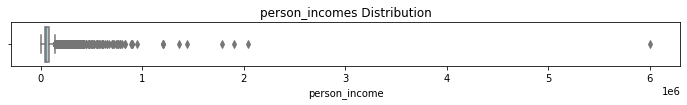

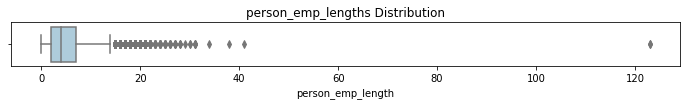

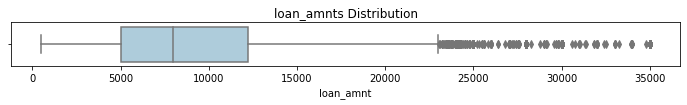

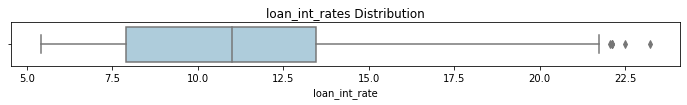

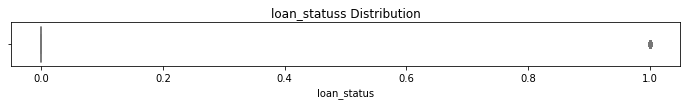

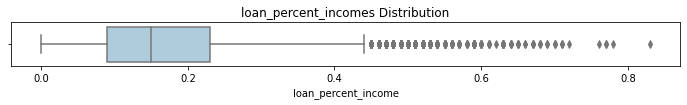

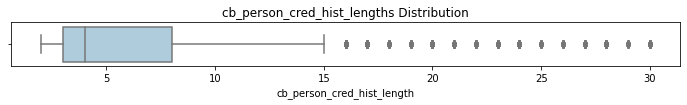

In [ ]:
for column in measures_df:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=measures_df, x=column,palette="Paired")
        plt.title(f'{column}''s Distribution')  

In [ ]:
for i in measures_df.columns:
    print ('# of rows beyond range of 3 standard deviations in ', i)
    print(len(measures_df[(measures_df[i] > measures_df[i].mean() + 3*measures_df[i].std()) | (measures_df[i] < measures_df[i].mean() - 3*measures_df[i].std())]))

# of rows beyond range of 3 standard deviations in  person_age
558
# of rows beyond range of 3 standard deviations in  person_income
233
# of rows beyond range of 3 standard deviations in  person_emp_length
321
# of rows beyond range of 3 standard deviations in  loan_amnt
337
# of rows beyond range of 3 standard deviations in  loan_int_rate
38
# of rows beyond range of 3 standard deviations in  loan_status
0
# of rows beyond range of 3 standard deviations in  loan_percent_income
336
# of rows beyond range of 3 standard deviations in  cb_person_cred_hist_length
284


###eliminating outliers

In [ ]:
base_credit.shape

(28638, 12)

In [ ]:
for col in columns:
  base_credit = base_credit[(base_credit[col] <= base_credit[col].mean() + 3*base_credit[col].std()) &
        (base_credit[col] >= base_credit[col].mean() - 3*base_credit[col].std())]

In [ ]:
base_credit.shape

(26620, 12)

###encoding

In [ ]:
base_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
base_credit['cb_person_default_on_file'] = base_credit['cb_person_default_on_file'].astype('category')
base_credit['loan_grade'] = base_credit['loan_grade'].astype('category')
base_credit['loan_intent'] = base_credit['loan_intent'].astype('category')
base_credit['person_home_ownership'] = base_credit['person_home_ownership'].astype('category')

In [ ]:
base_credit['cb_person_default_on_file_new'] = base_credit['cb_person_default_on_file'].cat.codes
base_credit['loan_grade_new'] = base_credit['loan_grade'].cat.codes
base_credit['loan_intent_new'] = base_credit['loan_intent'].cat.codes
base_credit['person_home_ownership_new'] = base_credit['person_home_ownership'].cat.codes

In [ ]:
base_credit['loan_intent_new'].head()

1     1
5     5
9     5
11    2
19    1
Name: loan_intent_new, dtype: int8

In [ ]:
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(base_credit[['cb_person_default_on_file_new','loan_grade_new', 'loan_intent_new', 'person_home_ownership_new']]).toarray(), index=np.array(base_credit.index))

In [ ]:
np.array(base_credit.index)

array([    1,     5,     9, ..., 32293, 32295, 32296])

In [ ]:
enc_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
New_df=base_credit.join(enc_data)

In [ ]:
New_df.columns

Index([                   'person_age',                 'person_income',
               'person_home_ownership',             'person_emp_length',
                         'loan_intent',                    'loan_grade',
                           'loan_amnt',                 'loan_int_rate',
                         'loan_status',           'loan_percent_income',
           'cb_person_default_on_file',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,            

In [ ]:
New_df = New_df.drop(columns=['cb_person_default_on_file', 'loan_grade', 'loan_intent', 'person_home_ownership'])

In [ ]:
New_df.columns

Index([                   'person_age',                 'person_income',
                   'person_emp_length',                     'loan_amnt',
                       'loan_int_rate',                   'loan_status',
                 'loan_percent_income',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,                              11,
                                    12,                              13,
                                    14,            

In [ ]:
New_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_new,loan_grade_new,...,9,10,11,12,13,14,15,16,17,18
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,21,10000,2.0,4500,8.63,1,0.45,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,24,10800,8.0,1750,10.99,1,0.16,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###stripping target values

In [ ]:
features = New_df.drop('loan_status', 1)
target = New_df['loan_status']

In [ ]:
features.shape

(26620, 30)

In [ ]:
target.head()

1     0
5     1
9     1
11    1
19    1
Name: loan_status, dtype: int64

In [ ]:
del New_df

###train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

###standardising data

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###feature extraction

In [ ]:
Estimator = RandomForestClassifier(n_estimators=10) 
#using random forest as the estimator for recursive feature extractor
FeatureExtractor = RFE(estimator=Estimator, n_features_to_select=20)
fitter = FeatureExtractor.fit(x_train, y_train)
extracted_features = features.columns[(fitter.get_support())]

In [ ]:
extracted_features

Index([                   'person_age',                 'person_income',
                   'person_emp_length',                     'loan_amnt',
                       'loan_int_rate',           'loan_percent_income',
          'cb_person_cred_hist_length', 'cb_person_default_on_file_new',
                      'loan_grade_new',               'loan_intent_new',
           'person_home_ownership_new',                               4,
                                     5,                               9,
                                    10,                              11,
                                    12,                              15,
                                    17,                              18],
      dtype='object')

In [ ]:
fitter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True])

In [ ]:
featureSelectedTrain = [row[fitter.get_support()] for row in x_train]
featureSelectedTest = [row[fitter.get_support()] for row in x_test]

###class imbalance

In [ ]:
base_credit['loan_status'].value_counts()

0    21039
1     5581
Name: loan_status, dtype: int64

####upsampling

In [ ]:
upsampler = SMOTE(random_state = 5)
x_train_ures_SMOTE, y_train_ures_SMOTE = upsampler.fit_resample(x_train, y_train.ravel())

In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))

Before OverSampling, the shape of train_X: (21296, 30)
Before OverSampling, the shape of train_y: (21296,) 

After OverSampling, the shape of train_X: (33616, 30)
After OverSampling, the shape of train_y: (33616,) 

Counts of label '0' - Before Oversampling:16808, After OverSampling: 16808
Counts of label '1' - Before Oversampling:4488, After OverSampling: 16808


####downsampling

In [ ]:
downsampler = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
x_train_dres, y_train_dres = downsampler.fit_resample(x_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))


Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (17412, 30)
After UnderSampling, the shape of train_y: (17412,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 12924
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


In [ ]:
x_train_dres, y_train_dres = downsampler.fit_resample(x_train_dres, y_train_dres)


In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))


Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (14791, 30)
After UnderSampling, the shape of train_y: (14791,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 10303
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


###PCA

####no resampling

In [ ]:
PCanalysis = PCA()
x_train_pca = PCanalysis.fit_transform(x_train)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16462406 0.26836134 0.34306381 0.41053816 0.47319864 0.52278867
 0.56543052 0.60662328 0.64751193 0.68777819 0.72613252 0.76313788
 0.79892112 0.83280874 0.86645296 0.90002942 0.93300633 0.96153991
 0.98969758 0.99483158 0.99769644 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
PCanalysis = PCA(19)
X_train_pca = PCanalysis.fit_transform(x_train)
X_test_transformed_pca = PCanalysis.transform(x_test)

In [ ]:
X_train_pca.shape

(21296, 19)

####upsample

In [ ]:
PCanalysis = PCA()
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.1706396  0.26371615 0.33450783 0.39935435 0.46100678 0.51648312
 0.56924496 0.62118415 0.67060957 0.71142982 0.7496501  0.78569248
 0.8198325  0.85378202 0.88736081 0.91718335 0.94534705 0.96960525
 0.99153178 0.99554267 0.99814182 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.1706396  0.26371615 0.33450783 0.39935435 0.46100678 0.51648312
 0.56924496 0.62118415 0.67060957 0.71142982 0.7496501  0.78569248
 0.8198325  0.85378202 0.88736081 0.91718335 0.94534705 0.96960525
 0.99153178]


In [ ]:
PCanalysis = PCA(18)
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
X_test_upsampled_transformed_pca = PCanalysis.transform(x_test)

In [ ]:
X_train_upsampled_pca.shape

(33616, 18)

In [ ]:
X_train_upsampled_pca[:,0].shape

(33616,)

[Text(0.5, 1.0, ' data PCA projection')]

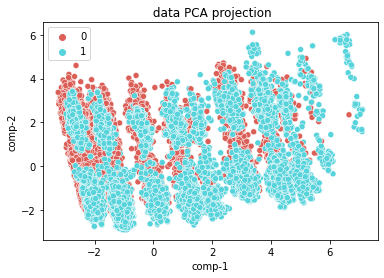

In [ ]:
df1 = pd.DataFrame()
df1["y"] = y_train_ures_SMOTE
df1["comp-1"] = X_train_upsampled_pca[:,0]
df1["comp-2"] = X_train_upsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df1).set(title=" data PCA projection") 

####downsample

In [ ]:
PCanalysis = PCA()
x_train_downlsampled_pca = PCanalysis.fit_transform(x_train_dres)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597 0.9942807  0.99761155 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597]


In [ ]:
PCanalysis = PCA(n_components=18)
x_train_downsampled_pca = PCanalysis.fit_transform(x_train_dres)
x_test_downsampled_transformed_pca = PCanalysis.transform(x_test)


In [ ]:
x_train_downsampled_pca.shape

(14791, 18)

[Text(0.5, 1.0, ' data PCA projection')]

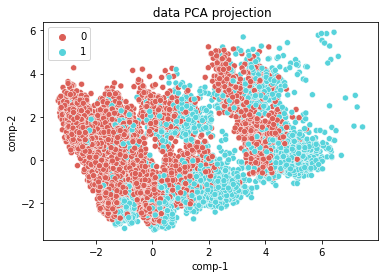

In [ ]:
df = pd.DataFrame()
df["y"] = y_train_dres
df["comp-1"] = x_train_downsampled_pca[:,0]
df["comp-2"] = x_train_downsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" data PCA projection") 

##Models

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [ ]:
def scores(y_test, y_prediction):
  print('Analysis of the Algorithm:\n')
  print(confusion_matrix(y_test, y_prediction))
  print(confusion_matrix(y_test, y_prediction))
  print(classification_report(y_test, y_prediction))
  print('Accuracy:',accuracy_score(y_test, y_prediction))
  print('Precision:',precision_score(y_test, y_prediction, average='weighted'))
  print('Recall:',recall_score(y_test, y_prediction, average='weighted'))
  print('F1 Score:',f1_score(y_test, y_prediction, average='weighted'))

In [ ]:
def roc(y_test, y_prediction):
  falsePositiveRate = dict()
  truePositiveRate = dict()
  threshold = dict()

  for i in range(6):    
      falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction, pos_label=i)

  plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
  plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')

  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC curve for LR ',dpi=300)

In [ ]:
# summarize results
def results(grid_result):
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
resultDic={}

##LR Model with GridsearchCV

In [ ]:
def LR(x_train, y_train):
  model = LogisticRegression()
  solver=['saga']
  penalty = ['l2', 'l1']
  c_values = [100, 10, 1.0, 0.1, 0.01]
  
  # define grid search
  grid = dict(solver=solver,penalty=penalty,C=c_values)
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(recall_score, average='weighted'), error_score=0)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [ ]:
LRresult={}

###Logistic Regression without resampling

In [ ]:
grid_result = LR(x_train, y_train)

In [ ]:
results(grid_result)

Best: 0.868426 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.867957 (0.001690) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.864810 (0.002488) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR1'])

Analysis of the Algorithm:

[[4015  216]
 [ 495  598]]
[[4015  216]
 [ 495  598]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.73      0.55      0.63      1093

    accuracy                           0.87      5324
   macro avg       0.81      0.75      0.77      5324
weighted avg       0.86      0.87      0.86      5324

Accuracy: 0.8664537941397445
Precision: 0.8582996906809005
Recall: 0.8664537941397445
F1 Score: 0.8588159828706913
testing recall Score for class1: 0.5471180237877402


In [ ]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5479055258467023


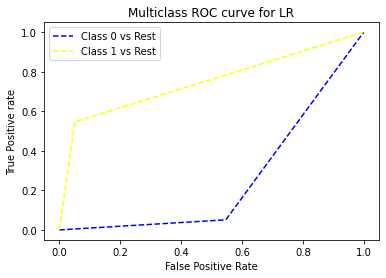

In [ ]:
roc(y_test, y_prediction)

###Logistic Regression without resampling and pca

In [ ]:
grid_result = LR(x_train_pca, y_train)

In [ ]:
results(grid_result)

Best: 0.868426 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001521) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.868426 (0.001758) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.865562 (0.001774) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", LRresult['LR2'])

Analysis of the Algorithm:

[[3707  524]
 [ 789  304]]
[[3707  524]
 [ 789  304]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4231
           1       0.37      0.28      0.32      1093

    accuracy                           0.75      5324
   macro avg       0.60      0.58      0.58      5324
weighted avg       0.73      0.75      0.74      5324

Accuracy: 0.7533809166040571
Precision: 0.7306159573269803
Recall: 0.7533809166040571
F1 Score: 0.7401148503638109
Class 1 recall score on test data: 0.27813357731015553


In [ ]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.5452317290552585


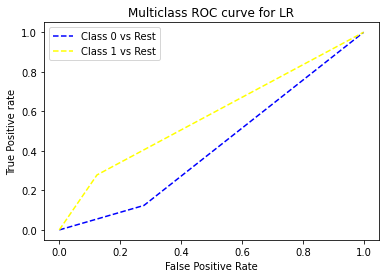

In [ ]:
roc(y_test, y_prediction)